# Understanding Hierarchical Clustering using sklearn Package

Step 1: Compute the proximity matrix using a particular distance metric

Step 2: Each data point is assigned to a cluster

Step 3: Merge the clusters based on a metric for the similarity between clusters

Step 4: Update the distance matrix

Step 5: Repeat Step 3 and Step 4 until only a single cluster remains

Visualize and understand the intput data

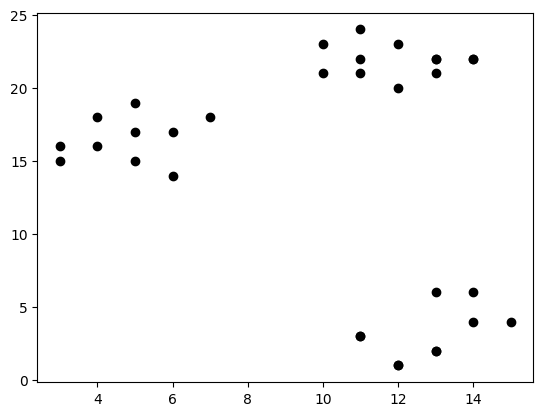

In [1]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color='black')
plt.show()

The Hierarchical Clustering -  Agglomerative clustering

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = list(zip(x, y))

# Min-Linkage
'''
The advantage of the Min method is that it can accurately handle non-elliptical shapes.
The disadvantages are that it is sensitive to noise and outliers.
'''
Z1 = linkage(data, method='single', metric='euclidean')

# Max-Linkage
'''
Max is less sensitive to noise and outliers in comparison to MIN method.
However, MAX can break large clusters and tends to be biased towards globular clusters.
'''
Z2 = linkage(data, method='complete', metric='euclidean')

# Average-Linkage
'''
The Average method defines the distance between clusters as the average pairwise distance among all pairs of points in the clusters.
'''
Z3 = linkage(data, method='average', metric='euclidean')

# Ward-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z4 = linkage(data, method='ward', metric='euclidean')

# Centroid-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z5 = linkage(data, method='centroid', metric='euclidean')

Visualize the clusters

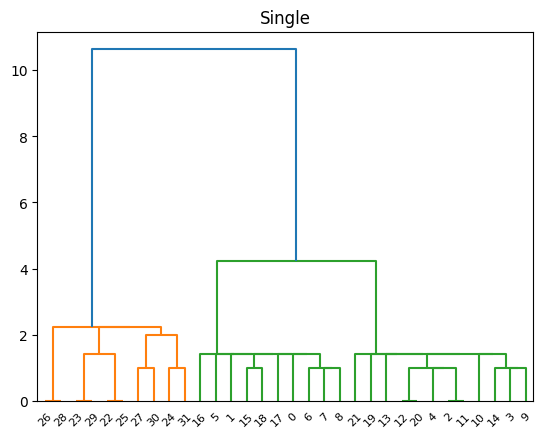

In [3]:
# Single linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.show()

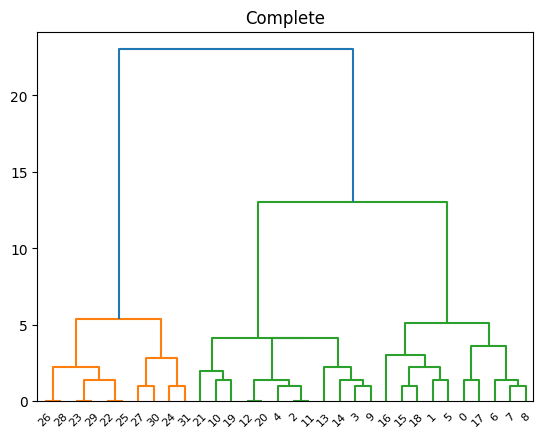

In [4]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.show()

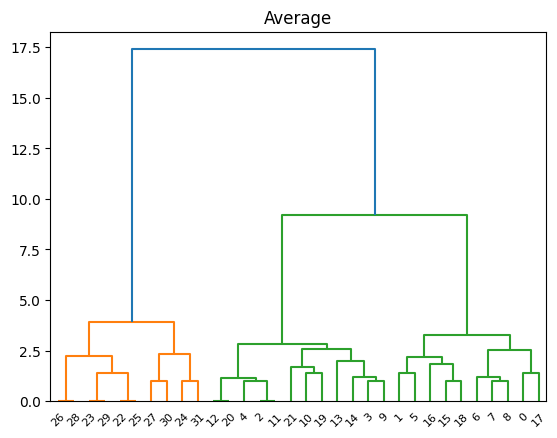

In [5]:
# Average linkage dendogram plot
plt.plot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.show()

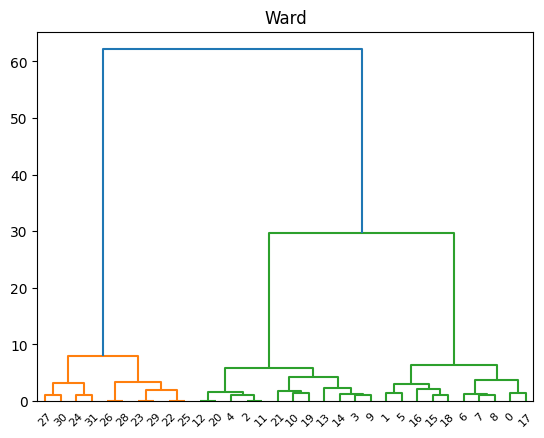

In [6]:
# Ward linkage dendogram plot
plt.plot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

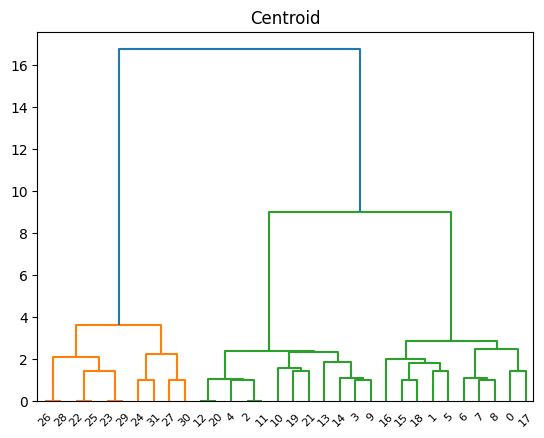

In [7]:
# Centroid linkage dendogram plot
plt.plot(2,2,5), dendrogram(Z5), plt.title('Centroid')
plt.show()

Post-Prunning to get number of clusters

In [10]:
from scipy.cluster.hierarchy import fcluster

c = fcluster(Z4, 3, criterion='maxclust')

print(f"Clusters: {c}")

Clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


# Cluster Evaluation without Ground-Truth

**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

**a**: *The mean distance between a sample and all other points in the same class.*

**b**: *The mean distance between a sample and all other points in the next nearest cluster.*


1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [11]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

0.7075249881542927

**Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (*where dispersion is defined as the sum of distances squared*).

1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. The score is fast to compute.

3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [12]:
metrics.calinski_harabasz_score(data, c)

103.23097614726471

**Davies-Bouldin Index**

This index signifies the average ‘*similarity*’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [13]:
metrics.davies_bouldin_score(data, c)

0.3986781148063054